In [1]:
import requests
from bs4 import BeautifulSoup as BS
import numpy as np
import pandas as pd
import re
import statsmodels.api as sm
import statsmodels.graphics as g
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
import time
from jupyterthemes import jtplot
jtplot.style()

In [2]:
SOF = pd.read_csv('../data/us_rep_source_of_funds.csv')

In [6]:
SOF.columns = SOF.columns.str.lower()

In [12]:
SOF['amount'] = (SOF['amount'].str.replace(r'\$|\,', '', regex = True)
                                  .astype('int')
                )

In [15]:
SOF['percentage'] = SOF['percentage'].str.replace(r'\%', '', regex = True).astype('float')/100

In [16]:
SOF

,state,district,name,party,incumbent,winner,type of contribution,amount,percentage
0,Alabama,AL01,Jerry Carl,R,False,True,Small Individual Contributions (≤ $200),44580,0.0226
1,Alabama,AL01,Jerry Carl,R,False,True,Large Individual Contributions,999616,0.5071
2,Alabama,AL01,Jerry Carl,R,False,True,PAC Contributions*,387000,0.1963
3,Alabama,AL01,Jerry Carl,R,False,True,Candidate self-financing,434656,0.2205
4,Alabama,AL01,Jerry Carl,R,False,True,Other,105470,0.0535
...,...,...,...,...,...,...,...,...,...
4465,Wyoming,WY01,Lynnette Grey Bull,D,False,False,Small Individual Contributions (≤ $200),64222,0.4771
4466,Wyoming,WY01,Lynnette Grey Bull,D,False,False,Large Individual Contributions,65975,0.4902
4467,Wyoming,WY01,Lynnette Grey Bull,D,False,False,PAC Contributions*,2800,0.0208
4468,Wyoming,WY01,Lynnette Grey Bull,D,False,False,Candidate self-financing,0,0.0000


In [22]:
TOC = SOF.groupby('type of contribution', as_index = False)['amount'].sum()
TOC_party = SOF.groupby(['type of contribution', 'party'], as_index = False)['amount'].sum()

In [47]:
TOC.sort_values('amount', ascending = False)

,type of contribution,amount
1,Large Individual Contributions,794772493
4,Small Individual Contributions (≤ $200),377748710
3,PAC Contributions*,370225791
2,Other,75481464
0,Candidate self-financing,49711634


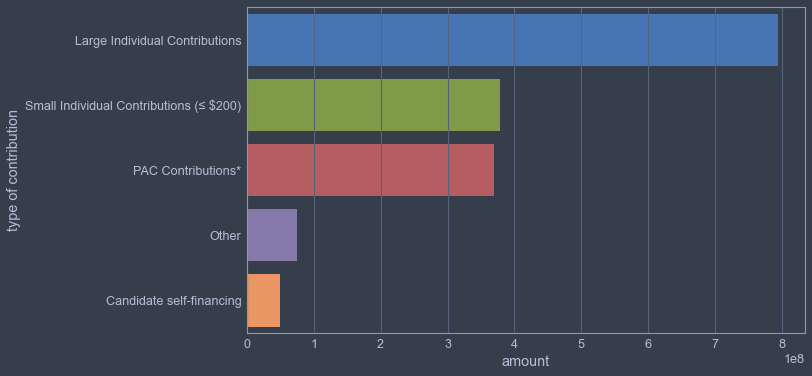

In [44]:
fig, ax = plt.subplots(figsize = (10,6))
sns.barplot(y = 'type of contribution', 
            x = 'amount', 
            data = TOC,
            orient = 'h',
            order = TOC.sort_values('amount', ascending = False)['type of contribution'],
            ax = ax
           );

In [49]:
TOC_party.sort_values('amount', ascending = False)

,type of contribution,party,amount
6,Large Individual Contributions,D,463826645
9,Large Individual Contributions,R,326907451
16,PAC Contributions*,D,208762227
24,Small Individual Contributions (≤ $200),R,196822197
21,Small Individual Contributions (≤ $200),D,179299721
19,PAC Contributions*,R,161101623
14,Other,R,45143028
4,Candidate self-financing,R,32817521
11,Other,D,30261972
1,Candidate self-financing,D,16237024


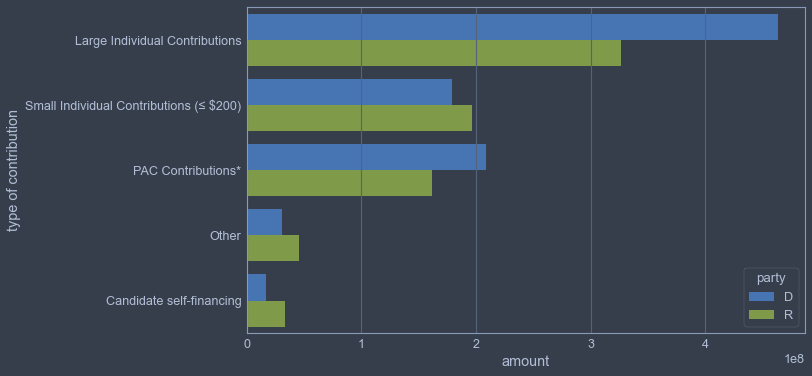

In [42]:
fig, ax = plt.subplots(figsize = (10,6))
sns.barplot(y = 'type of contribution', 
            x = 'amount', 
            hue = 'party', 
            data = TOC_party[TOC_party['party'].isin(['D','R'])],
            orient = 'h',
            order = TOC.sort_values('amount', ascending = False)['type of contribution'],
            ax = ax
           );